In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import os
import warnings
from PIL import Image
from IPython.display import display

In [32]:
print("""
# #####################################################################################################################
#  Loading Real Images - Part One (1)
# #####################################################################################################################
""")


# #####################################################################################################################
#  Loading Real Images - Part One (1)
# #####################################################################################################################



In [33]:
# Ignore warnings possibly occur with PIL module.
warnings.filterwarnings('ignore')

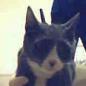

In [34]:
# Check full file path.
with Image.open('../../../notebooks/Data/CATS_DOGS/test/CAT/10107.jpg') as img:
    display(img)

In [35]:
# Load image names with path to a list of image names.
path = '../../../notebooks/Data/CATS_DOGS'
image_names = []

for folder, sub_folder, filenames in os.walk(path):
    for img in filenames:
        image_names.append(f'{folder}/{img}')

print(len(image_names))

24991


In [36]:
image_sizes = []
rejected = []

# Try and open each images in 'image_names' and make list of image sizes with it.
for item in image_names:
    try:
        with Image.open(item) as img:
            image_sizes.append(img.size)

    except RuntimeError:
        rejected.append(img)

print(len(image_sizes))
print(len(rejected))

24991
0


In [37]:
# Create a DatFrame with it.
df = pd.DataFrame(image_sizes)
print(df.head())
# Check image width details.
print(df[0].describe(), end='\n\n')
# Check image height details.
print(df[1].describe())

     0    1
0  500  375
1  320  240
2  320  177
3  461  320
4  220  300
count    24991.000000
mean       404.484815
std        108.944861
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

count    24991.000000
mean       361.032212
std         96.940093
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64


In [38]:
print("""
# #####################################################################################################################
#  Loading Real Images - Part Two (2) - Pre-processing, Transformation of Images
# #####################################################################################################################
""")


# #####################################################################################################################
#  Loading Real Images - Part Two (2) - Pre-processing, Transformation of Images
# #####################################################################################################################



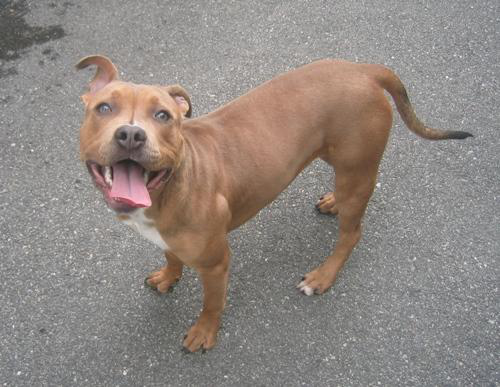

(500, 387)
(90, 95, 98)
<class 'torch.Tensor'>
torch.Size([3, 387, 500])


In [39]:
dog = Image.open("../../../notebooks/Data/CATS_DOGS/train/DOG/14.jpg")
display(dog)

print(dog.size)
print(dog.getpixel((0, 0)))

transform = transforms.Compose([
    transforms.ToTensor()
])

img = transform(dog)
print(type(img))
print(img.size())

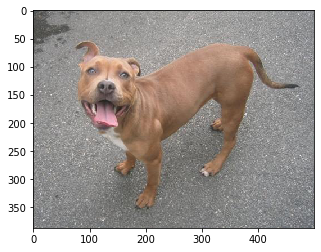

In [40]:
# Plot the image from the tensor created from the transformation above.
# Transpose the image to change dimension order of the image to compatible with plot image.
# ([3, 387, 500]) -> ([387, 500, 3]) using (1, 2, 0) tuple.
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

In [41]:
print(img)
# Considering a single pixel value (Getting all RGB values across 0th dimension hence (3, 387, 500)).
print(img[:, 0, 0])
# Now the single pixel value has changed to [0.3529, 0.3725, 0.3843] consider to original value
# (90, 95, 98). This value has been derived from dividing the original values by RGB full/max value 255
# value. That's a PyTorch doing to normalize the data.
print(f'{np.array([90, 95, 98]) / 255}')

tensor([[[0.3529, 0.3451, 0.3373,  ..., 0.5686, 0.5333, 0.5216],
         [0.3255, 0.3412, 0.3333,  ..., 0.5765, 0.5451, 0.5294],
         [0.2863, 0.3216, 0.3373,  ..., 0.5529, 0.5255, 0.4980],
         ...,
         [0.5765, 0.5451, 0.4824,  ..., 0.5686, 0.5059, 0.5216],
         [0.6157, 0.5922, 0.4941,  ..., 0.5294, 0.5176, 0.5176],
         [0.5922, 0.5843, 0.5020,  ..., 0.5882, 0.6314, 0.6039]],

        [[0.3725, 0.3647, 0.3569,  ..., 0.5725, 0.5373, 0.5255],
         [0.3451, 0.3608, 0.3529,  ..., 0.5804, 0.5490, 0.5333],
         [0.3059, 0.3412, 0.3569,  ..., 0.5569, 0.5294, 0.5020],
         ...,
         [0.5608, 0.5294, 0.4745,  ..., 0.5765, 0.5137, 0.5294],
         [0.6000, 0.5765, 0.4863,  ..., 0.5373, 0.5255, 0.5255],
         [0.5765, 0.5686, 0.4941,  ..., 0.5961, 0.6392, 0.6118]],

        [[0.3843, 0.3765, 0.3686,  ..., 0.5882, 0.5529, 0.5412],
         [0.3569, 0.3725, 0.3647,  ..., 0.5961, 0.5647, 0.5490],
         [0.3176, 0.3529, 0.3686,  ..., 0.5725, 0.5451, 0.

torch.Size([3, 250, 250])


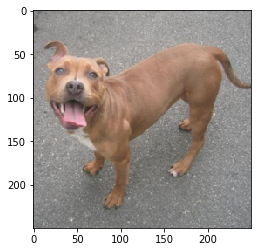

In [42]:
transform = transforms.Compose([
    # Resize the image transformation.
    # Could use a scalar value (then short axis resize by the
    # provided number, other axis change correspondingly) or
    # a tuple with (height, width).
    transforms.Resize(250), # OR a tuple with (height, width)
    # Center crop transformation. Could use a scalar value
    # (then short axis resize by the provided number, other axis
    # maintain a squared change) or a tuple with (height, width).
    transforms.CenterCrop((250, 250)), # OR a scalar number
    # Transform image to a Tensor object.
    transforms.ToTensor()
])

img = transform(dog)
print(img.shape)

plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

torch.Size([3, 387, 500])


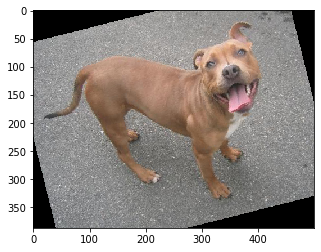

In [43]:
# Different Transforms.
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30, expand=False),
    transforms.ToTensor()
])

img = transform(dog)
print(img.shape)

plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


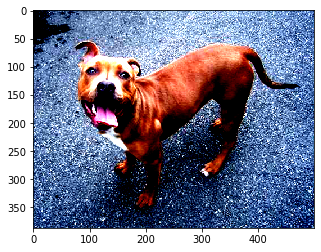

In [44]:
# Transform normalization on pre-trained models like 'GoogleNet'.
transform = transforms.Compose([
    transforms.ToTensor(),
    # Scalar values allowed for 'mean' and 'standard-deviation',
    # that would apply same value to all 3-dimensions.
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = transform(dog)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

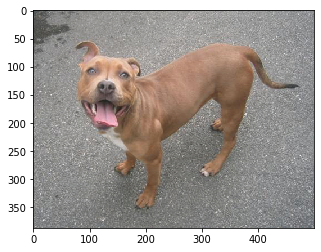

In [45]:
# De-normalize the transformation.
transform = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                                 std=[1/0.229, 1/0.224, 1/0.225])

img = transform(img)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

In [46]:
print("""
# #####################################################################################################################
#  CNN Custom Images - Part One (1) - Loading Data
# #####################################################################################################################
""")


# #####################################################################################################################
#  CNN Custom Images - Part One (1) - Loading Data
# #####################################################################################################################



In [47]:
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [48]:
# Image folder to load and process image data.
root = "../../../notebooks/Data/CATS_DOGS"

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

class_names = train_data.classes
print(class_names)

print(len(train_data))
print(len(test_data))

for image, label in train_loader:
    break

print(label)
print(image.shape)

['CAT', 'DOG']
18743
6248
tensor([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])
torch.Size([10, 3, 224, 224])


torch.Size([10, 3, 224, 224])


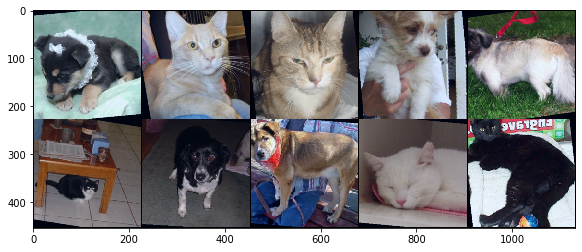

In [49]:
for images, labels in train_loader:
    break

print(images.shape)

im = make_grid(images, 5, normalize=True)
plt.figure(figsize=(12, 4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [50]:
# Define convolutional network.
class ConvolutionalNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(in_features=54 * 54 * 16, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = self.pool1(X)
        X = F.relu(self.conv2(X))
        X = self.pool1(X)
        X = F.relu(self.fc1(X.view(-1, 54 * 54 * 16)))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X))
        return X

torch.manual_seed(101)
model = ConvolutionalNetwork()
print(model)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [51]:
# Check parameter count.
count = 0
for param in model.parameters():
    count += param.numel()

print(count)

5610222


In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [53]:
print("""
# #####################################################################################################################
#  CNN Custom Images - Part Two (2) - Training and Evaluation Model
# #####################################################################################################################
""")


# #####################################################################################################################
#  CNN Custom Images - Part Two (2) - Training and Evaluation Model
# #####################################################################################################################



In [54]:
start = time.time()
epochs = 3

# LIMIT number of batch (OPTIONAL).
max_train_batch = 800   # Batch = 10 -> 10 * 800 = 8000 images
max_test_batch = 300    # Batch = 10 -> 10 * 300 = 3000 images

train_loss = []
test_loss = []
train_correct = []
test_correct = []

def train():
    for i in range(epochs):
        i += 1
        trn_crt = 0
        tst_crt = 0
        loss = 0

        for b, (X_train, y_train) in enumerate(train_loader):
            b += 1

            if b == max_train_batch:
                break

            y_pred = model.forward(X_train)
            loss = criterion(y_pred, y_train)

            predicted = torch.max(y_pred, dim=1)[1]
            trn_crt += (predicted == y_train).sum()

            # Back-propagate
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if b % 200 == 0:
                print(f'epoch: {i}, batch: {b} -> loss: {loss.item()}, accuracy: {trn_crt.item() * 100 / (b * 10)}%')

        train_loss.append(loss)
        train_correct.append(trn_crt)

        # RUN test
        with torch.no_grad():

            for b, (X_test, y_test) in enumerate(test_loader):

                if b == max_test_batch:
                    break

                y_pred = model.forward(X_test)
                loss = criterion(y_pred, y_test)

                predicted = torch.max(y_pred, dim=1)[1]
                tst_crt += (predicted == y_test).sum()

            test_loss.append(loss)
            test_correct.append(tst_crt)

    duration = time.time() - start
    print(f'Total time -> {duration / 60} minutes')

# train()

In [55]:
# torch.save(model.state_dict(), 'cat_dog_mode.pt')

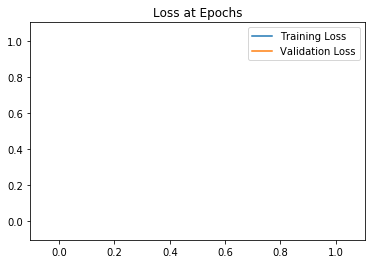

In [56]:
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.legend()
plt.title('Loss at Epochs')
plt.show()

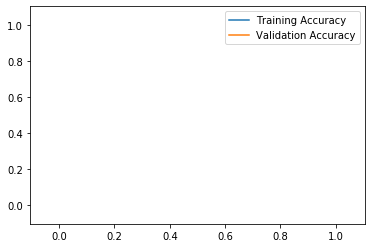

In [57]:
plt.plot([t / 80 for t in train_correct], label='Training Accuracy')
plt.plot([t / 30 for t in test_loss], label='Validation Accuracy')
plt.legend()
plt.show()

In [3]:
# WORKING WITH PRE-TRAINED MODELS.
alex_net = models.alexnet(pretrained=True)
print(alex_net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
# Freeze parameters (Weights and Biases) of the model to retain already trained values.
for param in alex_net.parameters():
    param.requires_grad = False

In [9]:
# In order to get our own classifications, need to modify classification layer of the model
# to return custom number of classifications.

torch.manual_seed(42)
# Update classifier section of the model (Due to this, this classifier section should be
# trained again with our data).
alex_net.classifier = nn.Sequential(
    nn.Linear(in_features=9216, out_features=1024),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=1024, out_features=2),
    nn.LogSoftmax(dim=1)
)

print(alex_net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Dro

In [10]:
# Count parameters.
count = 0
for param in alex_net.parameters():
    count += param.numel()

print(count)

11909954


In [12]:
# Define loss functions.
criterion = nn.CrossEntropyLoss()
# Only train the parameters hence, that's the newly setup portion of the 'alexNet' model.
optimizer = torch.optim.Adam(alex_net.classifier.parameters(), lr=0.001)

In [ ]:
# Train model, this is the same model traing as before, except forward feed data via alex_net model.
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1

        # Apply the model
        y_pred = alex_net(X_train)
        loss = criterion(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = alex_net(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [ ]:
img_index = 2019
img = test_data[img_index][0]
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [ ]:
alex_net.eval()
with torch.no_grad():

    new_pred = alex_net(im.view(1, 3, 224, 224)).argmax()
    print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')
